In [1]:
root_path = 'miniconda3'
import sys
sys.path.append(f'{root_path}envs/mp/lib/python3.12.4/site-packages/')

import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from mpi4py.MPI import COMM_WORLD
from IPython.display import clear_output, Math, HTML

In [2]:
comm = COMM_WORLD
rank = comm.Get_rank()

Rankfreq = 0.15 - 0.005*rank
print(f'Hi, im proccess {rank} and im starting the simulation on the wavelength {1/Rankfreq} μm')

Hi, im proccess 0 and im starting the simulation on the wavelength 6.666666666666667 μm


In [3]:
cell = mp.Vector3(16,8,0)  # This is the simulation window. Here is defined a 2D-cell with Δx=16um and Δy=8um 

pml_layers = [mp.PML(1.0)]  # Adding an absorbing layer (PML) of thickness 1 μm around all sides of the cell

geometry = [mp.Block(mp.Vector3(mp.inf,1,mp.inf),     # Defines a parallelepiped block of size ∞ × 1 × ∞
                     center=mp.Vector3(),             # Centered at (0,0)
                     material=mp.Medium(epsilon=12))] # Material with ε=12

# By default, any place where there are no objects there is air (ε=1)

In [4]:
sources = [mp.Source(mp.ContinuousSource(frequency=Rankfreq),  # Frequency f corresponds to a vacuum wavelength of 1/0.15=6.67 μm
                     component=mp.Ez,                      # Component Ez to specify a eletric current
                     center=mp.Vector3(7,0))]             # The current is located at (-7,0)

# Is important to leave a little space between sources and the cell boundaries, 
# to keep the boundary conditions from interfering with them.

In [23]:
resolution = 60

In [24]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

In [25]:
sim.run(until=500)  # Run until a time of t = 500

-----------
Initializing structure...
time for choose_chunkdivision = 0.000459194 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 60
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.538805 s
-----------


FloatProgress(value=0.0, description='0% done ', max=500.0)

Meep progress: 9.875/500.0 = 2.0% done in 4.0s, 198.6s to go
on time step 1186 (time=9.88333), 0.00337271 s/step
Meep progress: 20.025/500.0 = 4.0% done in 8.0s, 191.8s to go
on time step 2404 (time=20.0333), 0.00328669 s/step
Meep progress: 30.175/500.0 = 6.0% done in 12.0s, 186.9s to go
on time step 3623 (time=30.1917), 0.00328383 s/step
Meep progress: 40.266666666666666/500.0 = 8.1% done in 16.0s, 182.7s to go
on time step 4835 (time=40.2917), 0.00330306 s/step
Meep progress: 50.71666666666667/500.0 = 10.1% done in 20.0s, 177.2s to go
on time step 6090 (time=50.75), 0.00318791 s/step
Meep progress: 61.19166666666666/500.0 = 12.2% done in 24.0s, 172.2s to go
on time step 7347 (time=61.225), 0.00318632 s/step
Meep progress: 71.39166666666667/500.0 = 14.3% done in 28.0s, 168.2s to go
on time step 8571 (time=71.425), 0.00326801 s/step
Meep progress: 81.78333333333333/500.0 = 16.4% done in 32.0s, 163.7s to go
on time step 9817 (time=81.8083), 0.00321156 s/step
Meep progress: 92.116666666

## Parallel Simulation

In [26]:
cores = 4
resultPath = 'ParallelResults/Result.out'

In [27]:
!jupytext --to py MEEPParalleltesting.ipynb
!mpirun -np $cores python MEEPParalleltesting.py > $resultPath

[jupytext] Reading MEEPParalleltesting.ipynb in format ipynb
[jupytext] Writing MEEPParalleltesting.py (destination file replaced)


## Analyze

Getting the dieletric region

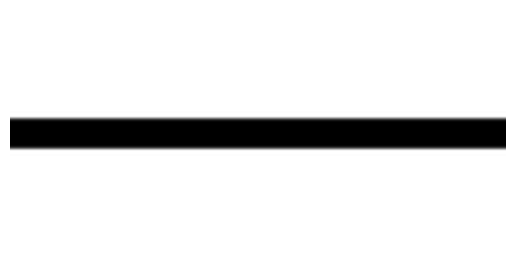

In [24]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

Getting results

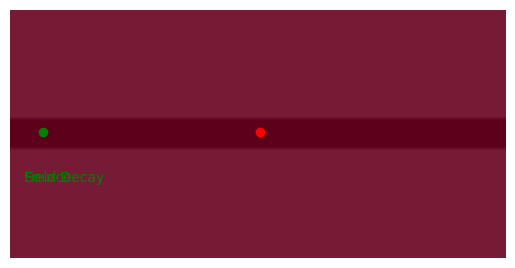

In [25]:
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.plot(10,39,'go')
plt.text(4,55,'Source',color='g')
plt.axis('off')
plt.plot(80,39,'ro')
plt.text(4,55,'Field Decay',color='g')
plt.show()